In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
df = pd.read_csv('/content/drive/My Drive/Infrared_Thermography_Temperature.csv')


In [4]:
df.head()

,SubjectID,aveOralF,aveOralM,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,161117-1,36.85,36.59,Male,41-50,White,24.0,28.0,0.8,0.7025,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,161117-2,37.00,37.19,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,161117-3,37.20,37.34,Female,21-30,White,24.0,26.0,0.8,0.8625,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,161117-4,36.85,37.09,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,161117-5,36.80,37.04,Male,18-20,White,24.0,27.0,0.8,0.8950,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


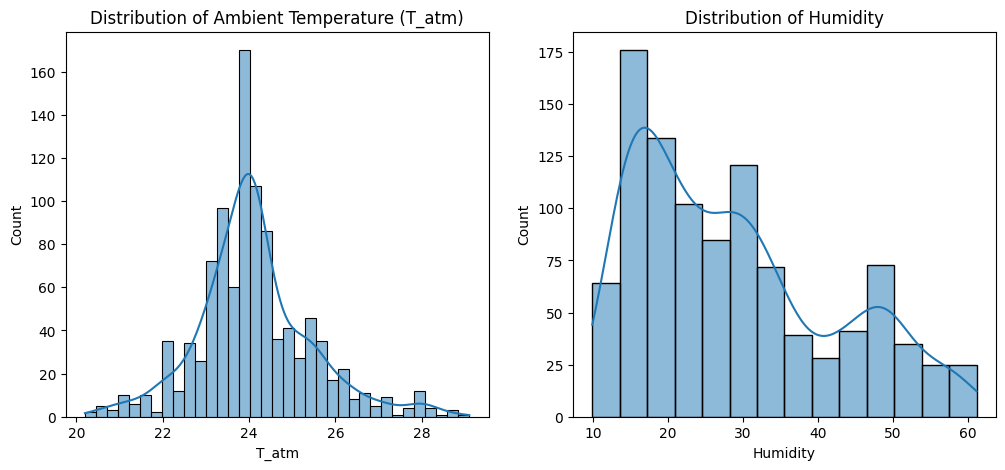

In [5]:
import seaborn as sns

# Histogram for Ambient Temperature and Humidity
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['T_atm'], kde=True, ax=axs[0])
axs[0].set_title('Distribution of Ambient Temperature (T_atm)')
sns.histplot(df['Humidity'], kde=True, ax=axs[1])
axs[1].set_title('Distribution of Humidity')
plt.show()


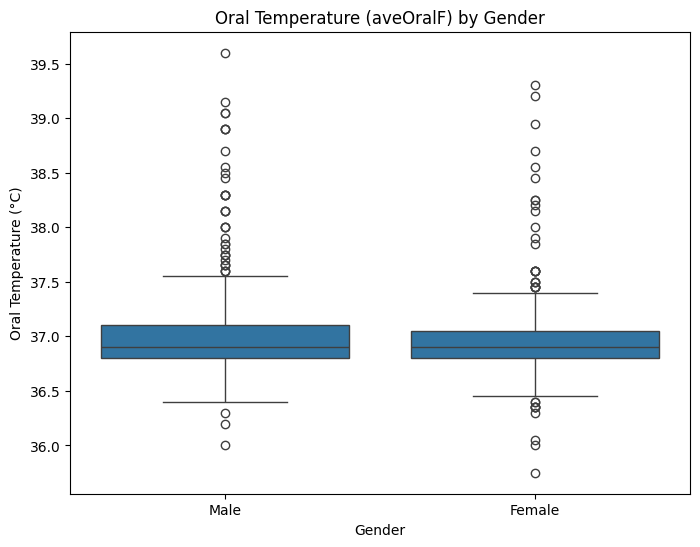

In [6]:
# Boxplot of Oral Temperature by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='aveOralF', data=df)
plt.title('Oral Temperature (aveOralF) by Gender')
plt.ylabel('Oral Temperature (°C)')
plt.show()


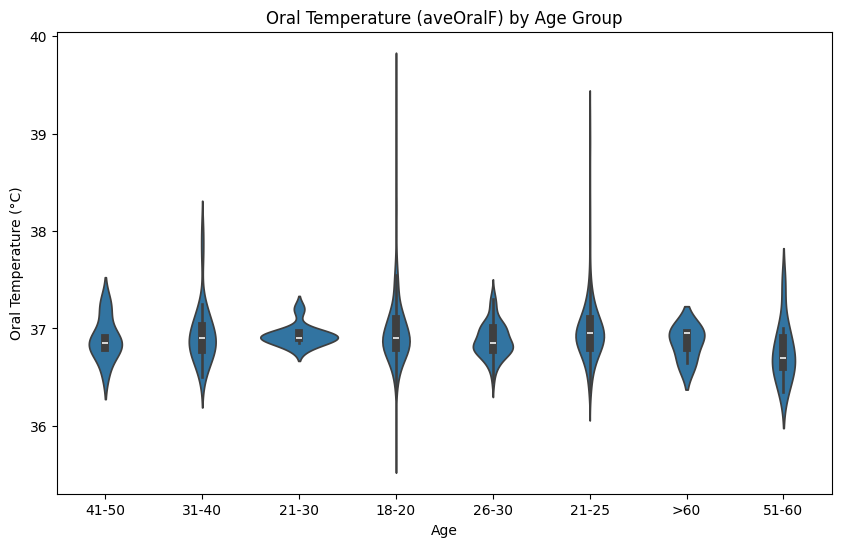

In [7]:
# Violin plot of oral temperature by Age
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', y='aveOralF', data=df)
plt.title('Oral Temperature (aveOralF) by Age Group')
plt.ylabel('Oral Temperature (°C)')
plt.show()


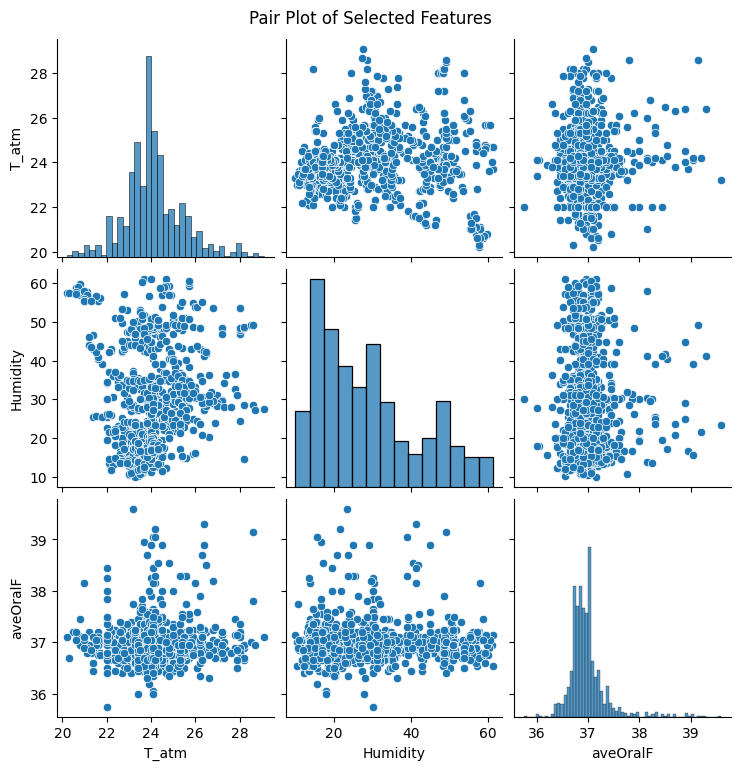

In [8]:
# Pair plot for selected continuous features
sns.pairplot(df, vars=['T_atm', 'Humidity', 'aveOralF'])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


# Preprocessing

In [9]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

SubjectID      0
aveOralF       0
aveOralM       0
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64
          aveOralF     aveOralM        T_atm     Humidity     Distance  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1018.000000   
mean     36.979216    37.028382    24.115392    28.723039     0.729784   
std       0.386403     0.509502     1.336338    13.071627     2.456486   
min      35.750000    35.540000    20.200000     9.900000     0.540000   
25%  

In [10]:
df['Distance'].fillna(df['Distance'].mean(), inplace=True)

<ipython-input-10-737abdb21d24>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Distance'].fillna(df['Distance'].mean(), inplace=True)


In [11]:
# Check for missing values
print(df.isnull().sum())

SubjectID      0
aveOralF       0
aveOralM       0
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64


In [12]:
# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Age', 'Ethnicity']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le




In [13]:
# Select continuous variables and scale them
continuous_features = ['T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1',
                       'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1',
                       'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1',
                       'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1',
                       'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1',
                       'T_OR_Max1']
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])


In [15]:
df.columns

Index(['SubjectID', 'aveOralF', 'aveOralM', 'Gender', 'Age', 'Ethnicity',
       'T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1',
       'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1',
       'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1',
       'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1',
       'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1',
       'T_OR_Max1'],
      dtype='object')

In [16]:
df = df.drop(['SubjectID'], axis=1)

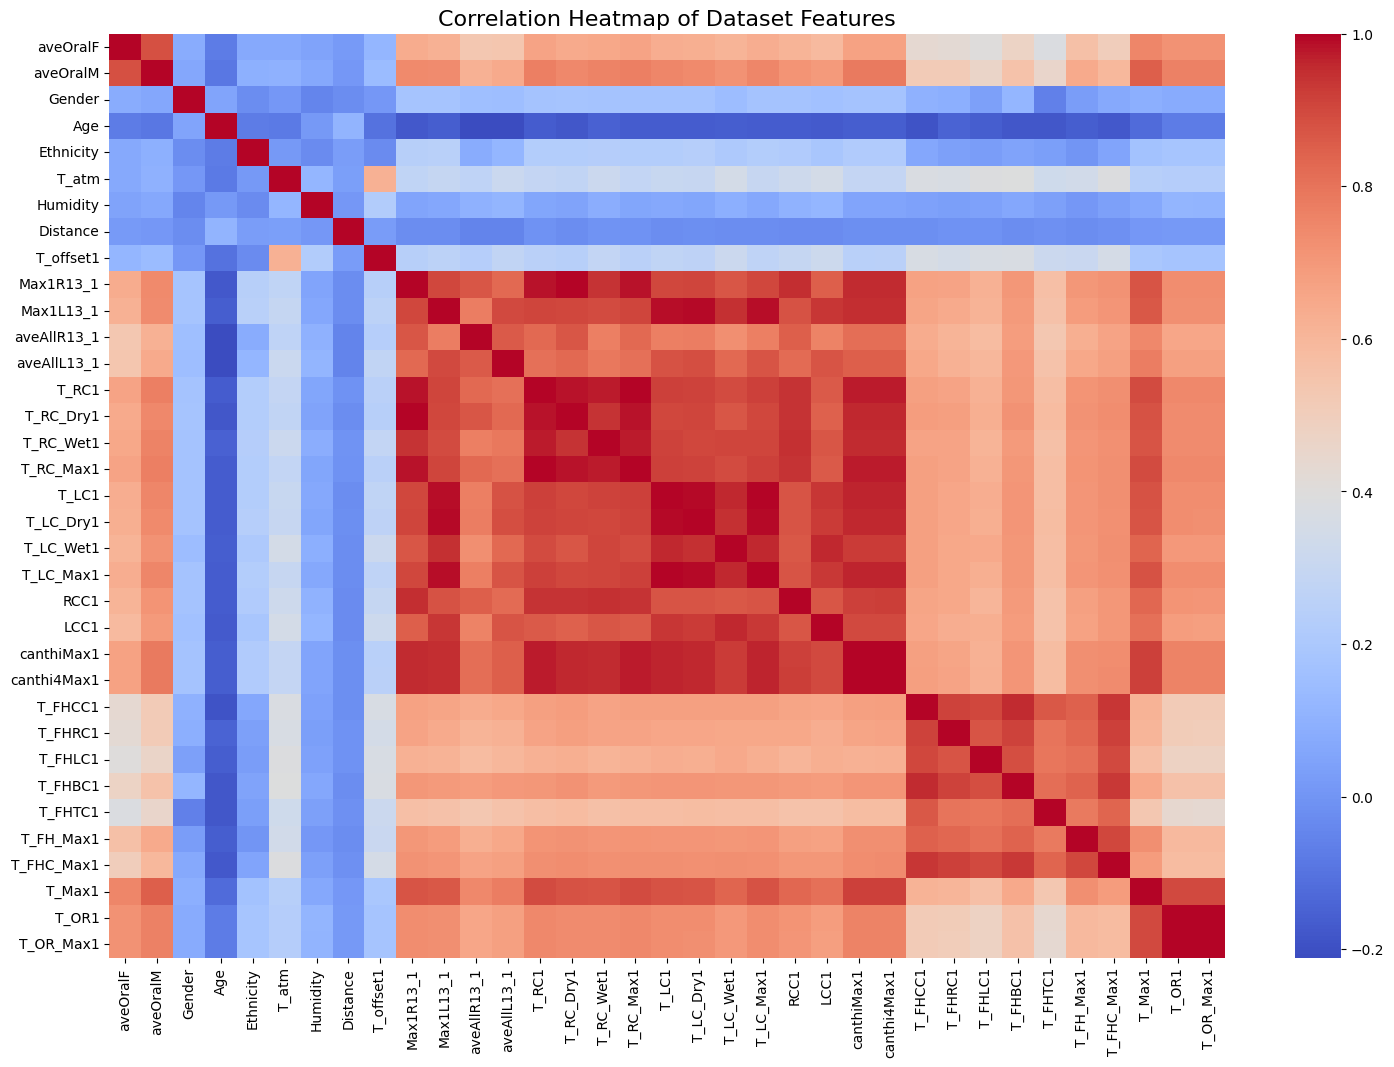

In [18]:
# Correlation Heatmap
plt.figure(figsize=(18, 12))
correlation_matrix = df.corr()  # Compute pairwise correlation of features
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Dataset Features', fontsize=16)
plt.show()

In [ ]:
# Separate features and target variables
X = df.drop(['aveOralF', 'aveOralM', 'SubjectID'], axis=1)
y = df['aveOralF']  # Choosing 'aveOralF' as the target; adjust as needed

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model

In [ ]:
# CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Reshape data for CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Train CNN Model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=50, validation_data=(X_test_cnn, y_test), batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1024.3318 - mae: 31.3063 - val_loss: 229.2049 - val_mae: 13.5002
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 220.1975 - mae: 12.2575 - val_loss: 103.7155 - val_mae: 8.3717
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 125.8431 - mae: 8.7069 - val_loss: 54.0609 - val_mae: 5.9087
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59.8586 - mae: 5.7456 - val_loss: 31.9964 - val_mae: 4.4775
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.4119 - mae: 4.4912 - val_loss: 21.8569 - val_mae: 3.6881
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.3448 - mae: 3.5299 - val_loss: 16.1129 - val_mae: 3.1811
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.4703 - mae: 3.2480 - val_loss: 12.5281 - val_mae: 2.8815
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.1639 - mae: 2.7976 - val_loss: 9.2077 - val_mae: 2.4826
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

In [ ]:
# Evaluate CNN Model
cnn_preds = cnn_model.predict(X_test_cnn)

# Ensure y_test is converted to a Numpy array and has the correct shape
y_test_array = y_test.to_numpy().reshape(-1)  # Flatten to 1D array if needed
cnn_preds = cnn_preds.reshape(-1)  # Flatten predictions to 1D array

# Calculate evaluation metrics
mae = np.mean(np.abs(cnn_preds - y_test_array))          # Mean Absolute Error
mse = np.mean((cnn_preds - y_test_array) ** 2)           # Mean Squared Error
rmse = np.sqrt(mse)                                      # Root Mean Squared Error

# Display CNN Model Performance
print("CNN Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
CNN Model Performance:
Mean Absolute Error (MAE): 0.3639559240902174
Mean Squared Error (MSE): 0.2758583737356851
Root Mean Squared Error (RMSE): 0.525222213673113


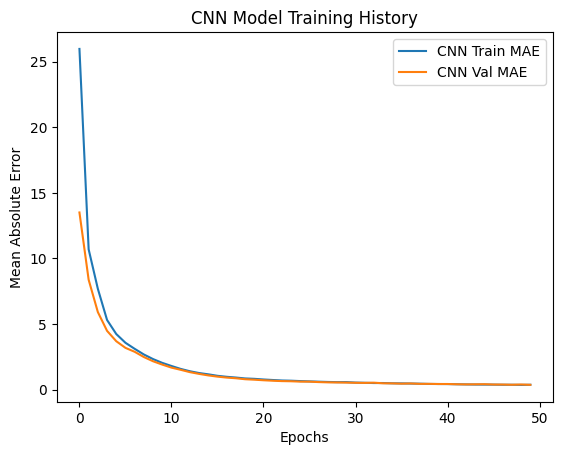

In [ ]:
# Plot CNN Training History
plt.plot(cnn_history.history['mae'], label='CNN Train MAE')
plt.plot(cnn_history.history['val_mae'], label='CNN Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('CNN Model Training History')
plt.show()

# RNN Model

In [ ]:
# RNN Model
rnn_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Reshape data for RNN
X_train_rnn = np.expand_dims(X_train, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)

# Train RNN Model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=50, validation_data=(X_test_rnn, y_test), batch_size=32)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1359.2310 - mae: 36.8402 - val_loss: 1320.5415 - val_mae: 36.3338
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1302.0148 - mae: 35.8686 - val_loss: 1320.8091 - val_mae: 36.3383
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1312.7235 - mae: 36.2137 - val_loss: 1303.4382 - val_mae: 36.0955
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1275.8776 - mae: 35.5829 - val_loss: 1099.9806 - val_mae: 32.4920
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 749.5852 - mae: 24.1406 - val_loss: 12.7177 - val_mae: 2.9660
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 35.6642 - mae: 4.2256 - val_loss: 30.4664 - val_mae: 5.2182
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.1253 - mae: 3.0952 - val_loss: 2.1076 - val_mae: 1.1198
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.3861 - mae: 1.4369 - val_loss: 1.2312 - val_mae: 0.9036
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate RNN Model
rnn_preds = rnn_model.predict(X_test_rnn)

y_test_array = y_test.to_numpy().reshape(-1)  # Flatten to 1D array if needed
rnn_preds = rnn_preds.reshape(-1)


# Calculate evaluation metrics
mae = np.mean(np.abs(rnn_preds - y_test_array))         # Mean Absolute Error
mse = np.mean((rnn_preds - y_test_array) ** 2)          # Mean Squared Error
rmse = np.sqrt(mse)                                     # Root Mean Squared Error

# Display RNN Model Performance
print("RNN Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RNN Model Performance:
Mean Absolute Error (MAE): 0.2304186129102519
Mean Squared Error (MSE): 0.08815523607856104
Root Mean Squared Error (RMSE): 0.29690947455169064


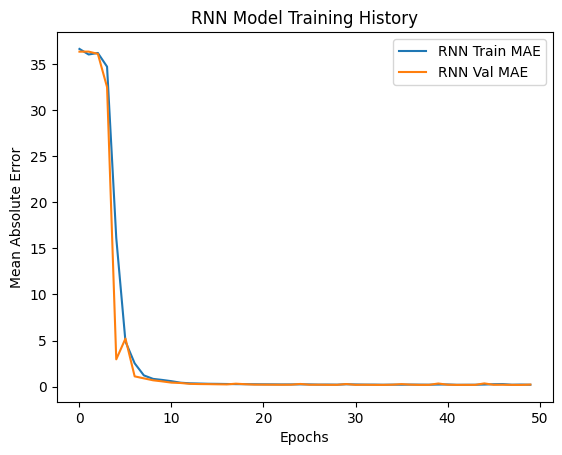

In [ ]:
# Plot RNN Training History
plt.plot(rnn_history.history['mae'], label='RNN Train MAE')
plt.plot(rnn_history.history['val_mae'], label='RNN Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('RNN Model Training History')
plt.show()

# GRU Model

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# Define the GRU Model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Reshape data for GRU
X_train_gru = np.expand_dims(X_train, axis=2)
X_test_gru = np.expand_dims(X_test, axis=2)

# Train GRU Model
gru_history = gru_model.fit(X_train_gru, y_train, epochs=50, validation_data=(X_test_gru, y_test), batch_size=32)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1363.6664 - mae: 36.9250 - val_loss: 1333.9487 - val_mae: 36.5208
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1270.4023 - mae: 35.3844 - val_loss: 114.1589 - val_mae: 8.3998
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 46.8396 - mae: 4.4739 - val_loss: 1.3929 - val_mae: 1.0561
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.2793 - mae: 0.9970 - val_loss: 0.9725 - val_mae: 0.8834
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9432 - mae: 0.8627 - val_loss: 0.8286 - val_mae: 0.8151
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.7516 - mae: 0.7555 - val_loss: 0.7454 - val_mae: 0.7759
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.5688 - mae: 0.6515 - val_loss: 0.2820 - val_mae: 0.4469
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2798 - mae: 0.4104 - val_loss: 0.0911 - val_mae: 0.2341
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
GRU Model Performance:
Mean Absolute Error (MAE): 0.17662544998468171
Mean Squared Error (MSE): 0.05196111974624844
Root Mean Squared Error (RMSE): 0.22794981848259593


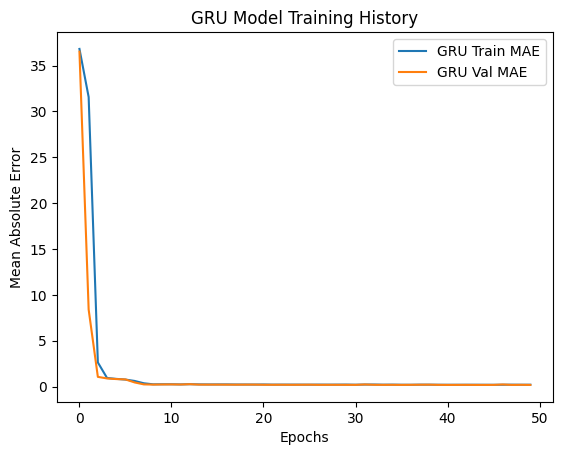

In [ ]:
# Evaluate GRU Model
gru_preds = gru_model.predict(X_test_gru)

# Ensure y_test is a Numpy array and reshape if necessary
y_test_array = y_test.to_numpy().reshape(-1)  # Flatten to 1D array if needed
gru_preds = gru_preds.reshape(-1)  # Flatten predictions to 1D array


# Calculate evaluation metrics
mae = np.mean(np.abs(gru_preds - y_test_array))
mse = np.mean((gru_preds - y_test_array) ** 2)
rmse = np.sqrt(mse)

# Display GRU Model Performance
print("GRU Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot GRU Training History
plt.plot(gru_history.history['mae'], label='GRU Train MAE')
plt.plot(gru_history.history['val_mae'], label='GRU Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('GRU Model Training History')
plt.show()
